In [43]:
import numpy as np
import archetypes as arch
import pandas as pd

In [143]:
df = pd.read_csv("data/players_22.csv")

df["player_positions"] = df["player_positions"].apply(lambda x: x.split(", ")[0])

top_leagues = [
    "Spain Primera Division",
    "German 1. Bundesliga",
    "English Premier League",
    "Italian Serie A",
    "French Ligue 1"
    ]

df = df.query('league_name in @top_leagues')

def_pos = ["LB", "RB", "CB"]
mid_pos = ["CDM", "CM", "CAM"]
att_pos = ["LW", "RW", "ST"]

pos = def_pos + mid_pos + att_pos

df = df.query('player_positions == @pos')

df_info = df.loc[:, ["short_name", "player_positions"]]
df_data = df.loc[:, "attacking_crossing":"defending_sliding_tackle"]

/var/folders/tj/q2qz82qj46qf7mwzd_jqkxnc0000gn/T/ipykernel_60901/2033013762.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/players_22.csv")


In [144]:
df_data

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle
0,85,95,70,91,88,96,93,94,91,96,...,94,44,40,93,95,75,96,20,35,24
1,71,95,90,85,89,85,79,85,70,88,...,87,81,49,95,81,90,88,35,42,19
2,87,95,90,80,86,88,81,84,77,88,...,93,63,29,95,76,88,95,24,32,24
3,85,83,63,86,86,95,88,87,81,95,...,81,63,37,86,90,93,93,35,32,29
4,94,82,55,94,82,88,85,83,93,91,...,91,76,66,88,94,83,89,68,65,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18272,46,53,50,48,50,51,49,39,41,53,...,51,37,19,52,48,52,47,17,22,22
18442,52,34,43,47,31,49,38,43,39,50,...,30,45,46,44,38,43,42,48,54,52
18510,56,39,36,55,36,58,42,37,53,59,...,40,45,42,55,52,48,50,48,43,44
18692,41,42,42,55,39,53,34,39,52,52,...,40,57,40,50,53,37,47,34,45,44


In [145]:
model = arch.BiAA(n_archetypes=(3, 3), random_state=0)

In [146]:
_ = model.fit(df_data)

In [147]:
model.archetypes_

array([[40.16133257, 95.        , 95.        ],
       [81.71712809, 32.        , 76.        ],
       [85.82828719, 70.        , 20.        ]])

In [148]:
a = pd.DataFrame(model.alphas_)
a.index = df_info["short_name"]

<AxesSubplot: >

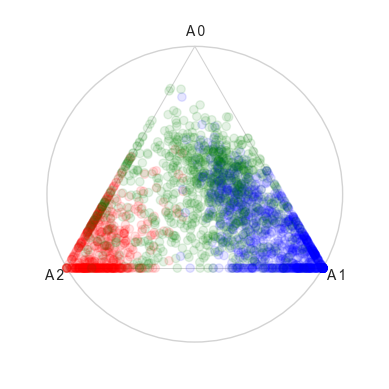

In [149]:
c = np.array(['b'] * len(a))
c[np.isin(df_info['player_positions'], ["LW", "RW", "ST"])] = "r"
c[np.isin(df_info['player_positions'], ["CM", "CAM", "CDM"])] = "g"
c[np.isin(df_info['player_positions'], ["LB", "RB", "CB"])] = "b"

arch.simplex(a, alpha=0.1, c = c)

In [154]:
g = pd.DataFrame(model.gammas_.T)
g.index = df_data.columns

<AxesSubplot: >

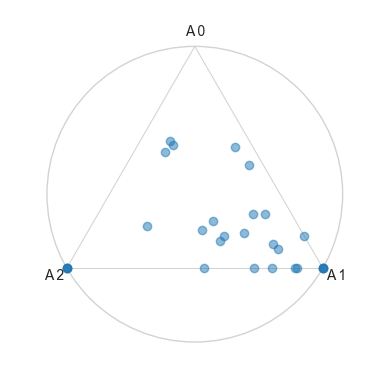

In [157]:
arch.simplex(g, alpha=0.5)